In [15]:
import pandas as pd

#Loading dataset
wine = pd.read_csv('winequality-red.csv')
wine_test = pd.read_csv('winequality-red_test.csv')

In [2]:
#pip install autograd

In [14]:
from autograd import grad
from autograd import numpy
from matplotlib import pyplot

In [16]:
#Let's check how the data is distributed
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [17]:
wine_test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.3,0.670,0.02,2.20,0.072,31,92,0.99566,3.32,0.68,11.066667
1,7.2,0.370,0.32,2.00,0.062,15,28,0.99470,3.23,0.73,11.300000
2,7.4,0.785,0.19,5.20,0.094,19,98,0.99713,3.16,0.52,9.566667
3,6.9,0.630,0.02,1.90,0.078,18,30,0.99712,3.40,0.75,9.800000
4,6.9,0.580,0.20,1.75,0.058,8,22,0.99322,3.38,0.49,11.700000


In [20]:
#Information about the data columns

wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1439 entries, 0 to 1438
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         1439 non-null   float64 
 1   volatile acidity      1439 non-null   float64 
 2   citric acid           1439 non-null   float64 
 3   residual sugar        1439 non-null   float64 
 4   chlorides             1439 non-null   float64 
 5   free sulfur dioxide   1439 non-null   float64 
 6   total sulfur dioxide  1439 non-null   float64 
 7   density               1439 non-null   float64 
 8   pH                    1439 non-null   float64 
 9   sulphates             1439 non-null   float64 
 10  alcohol               1439 non-null   float64 
 11  quality               1439 non-null   category
dtypes: category(1), float64(11)
memory usage: 125.3 KB


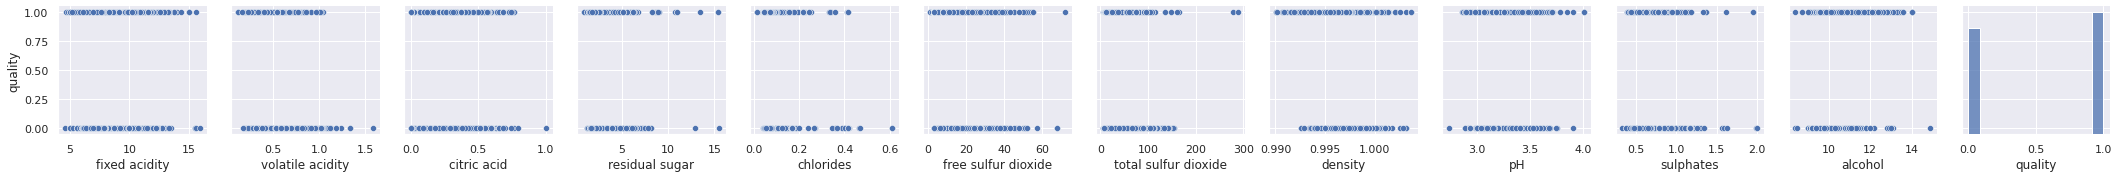

In [109]:
import seaborn
seaborn.set()
plot_wine = wine.astype(numpy.int64)
y_col = 'quality'
x_col = wine.columns.drop(['quality'])
seaborn.pairplot(data=wine,y_vars=y_col)

In [19]:
bins = (0, 5, 10)
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)
wine_test['quality'] = pd.cut(wine_test['quality'], bins = bins, labels = group_names)

KeyError: 'quality'

In [21]:
# Check quality
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [28]:
from sklearn.preprocessing import LabelEncoder

#Now lets assign a labels to our quality variable
label_quality = LabelEncoder()

In [29]:
wine['quality'] = label_quality.fit_transform(wine['quality'])

In [30]:
wine['quality'].value_counts()

1    769
0    670
Name: quality, dtype: int64

In [31]:
#Now seperate the dataset as response variable and feature variabes
X = wine.drop('quality', axis = 1)
y = wine['quality']


In [26]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
X_scaled = standard_scaler.fit_transform(X)
X_test = standard_scaler.fit_transform(wine_test)
X_scaled = numpy.hstack((numpy.ones((X_scaled.shape[0],1)),X_scaled))
X_test = numpy.hstack((numpy.ones((X_test.shape[0],1)),X_test))

### Loss 함수 구현

lambda 까지 사용

In [56]:
def logistic(x):
    out = 1. /(1.+numpy.exp(-x))
    return out
def logistic_model(x,params):
    w = params[0]
    b = params[1]
    out = logistic(numpy.dot(x,w)+b)
    return out


In [54]:
def classify(x, params):
    probabilities = logistic_model(x,params)
    labels = (probabilities >= 0.5).astype(float)
    return labels

In [55]:
def performance(predictions, answers, beta=1.0):
    good_idx = (answers == 1)  # the location where the answers are 1
    bad_idx = (answers == 0)  # the location where the answers are 0
    # good positive: answers are 1 and predictions are also 1
    n_tp = numpy.count_nonzero(predictions[good_idx] == 1)
    
    # bad positive: answers are 0 but predictions are 1
    n_fp = numpy.count_nonzero(predictions[bad_idx] == 1)
    
    # good negative: answers are 0 and predictions are also 0
    n_tn = numpy.count_nonzero(predictions[bad_idx] == 0)
    
    # bad negative: answers are 1 but predictions are 0
    n_fn = numpy.count_nonzero(predictions[good_idx] == 0)
    
    # precision, recall, and f-score
    precision = n_tp / (n_tp + n_fp)
    recall = n_tp / (n_tp + n_fn)
    score = (
        (1.0 + beta**2) * precision * recall / 
        (beta**2 * precision + recall)
    )

    accuracy = (n_tp + n_tn) / (n_tp + n_fn + n_fp + n_tn)

    return precision, recall, score, accuracy

In [65]:
from sklearn.model_selection import train_test_split


In [96]:
# regularization with sqr
def model_loss(x, y, params, _lambda=1.0):
    pred = logistic_model(x,params)
    loss = - (numpy.dot(y,numpy.log(pred+1e-15))+numpy.dot(1.-y,numpy.log(1.-pred+1e-15))
    ) + _lambda * numpy.sum(params[0]**2)
    return loss

X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size = 0.3, random_state = None, shuffle=False)

gradients = grad(model_loss, argnum=2)
lr = 1e-5
w = numpy.random.rand(X_train.shape[1])
b = numpy.random.rand(1)
# a variable for the change in validation loss
change = numpy.inf

# a counter for optimization iterations
i = 0

# a variable to store the validation loss from the previous iteration
old_val_loss = 1e-15

# keep running if:
#   1. we still see significant changes in validation loss
#   2. iteration counter < 10000
while change >= 1e-5 and i < 10000:
    
    # calculate gradients and use gradient descents
    grads = gradients(X_train, y_train, (w, b))
    w -= (grads[0] * lr)
    b -= (grads[1] * lr)
    
    # validation loss
    val_loss = model_loss(X_val, y_val, (w, b))
    
    # calculate f-scores against the validation dataset
    pred_labels_val = classify(X_val, (w, b))
    score = performance(pred_labels_val, y_val)

    # calculate the chage in validation loss
    change = numpy.abs((val_loss-old_val_loss)/old_val_loss)

    # update the counter and old_val_loss
    i += 1
    old_val_loss = val_loss
    
    # print the progress every 10 steps
    if i % 10 == 0:
        print("{}...".format(i), end="")

print("")
print("")
print("Upon optimization stopped:")
print("    Iterations:", i)
print("    Validation loss:", val_loss)
print("    Validation precision:", score[0])
print("    Validation recall:", score[1])
print("    Validation F-score:", score[2])
print("    Validation Accuracy:", score[3])
print("    Change in validation loss:", change)

10...20...30...40...50...60...70...80...90...100...110...120...130...140...150...160...170...180...190...200...210...220...230...240...250...260...270...280...290...300...310...320...330...340...350...360...370...380...390...400...410...420...430...440...450...460...470...480...490...500...510...520...530...540...550...560...570...580...590...600...610...620...630...640...650...660...670...680...690...700...710...720...730...740...750...760...770...780...790...800...810...820...830...840...850...860...870...880...890...900...910...920...930...940...950...960...970...980...990...1000...1010...1020...1030...1040...1050...1060...1070...1080...1090...1100...1110...1120...1130...1140...1150...1160...1170...1180...1190...1200...1210...1220...1230...1240...1250...1260...1270...1280...1290...1300...1310...1320...1330...1340...1350...1360...1370...1380...1390...1400...1410...1420...1430...1440...1450...1460...1470...1480...1490...1500...1510...1520...1530...1540...1550...1560...1570...1580...15

In [112]:
# regularization with abs
def model_loss_abs(x, y, params, _lambda=0.0):
    pred = logistic_model(x,params)
    loss = - (numpy.dot(y,numpy.log(pred+1e-15))+numpy.dot(1.-y,numpy.log(1.-pred+1e-15))
    ) + _lambda * numpy.sum(numpy.abs(params[0]))
    return loss

X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size = 0.1, random_state = None, shuffle=False)
gradients = grad(model_loss_abs, argnum=2)
lr = 1e-5
w = numpy.zeros(X_train.shape[1], dtype=float)
b = 0.
# a variable for the change in validation loss
change = numpy.inf

# a counter for optimization iterations
i = 0

# a variable to store the validation loss from the previous iteration
old_val_loss = 1e-15

while change >= 1e-5 and i < 10000:
    
    # calculate gradients and use gradient descents
    grads = gradients(X_train, y_train, (w, b))
    w -= (grads[0] * lr)
    b -= (grads[1] * lr)
    
    # validation loss
    val_loss = model_loss_abs(X_val, y_val, (w, b))
    
    # calculate f-scores against the validation dataset
    pred_labels_val = classify(X_val, (w, b))
    score = performance(pred_labels_val, y_val)

    # calculate the chage in validation loss
    change = numpy.abs((val_loss-old_val_loss)/old_val_loss)

    # update the counter and old_val_loss
    i += 1
    old_val_loss = val_loss
    
    # print the progress every 10 steps
    if i % 10 == 0:
        print("{}...".format(i), end="")

print("")
print("")
print("Upon optimization stopped:")
print("    Iterations:", i)
print("    Validation loss:", val_loss)
print("    Validation precision:", score[0])
print("    Validation recall:", score[1])
print("    Validation F-score:", score[2])
print("    Validation Accuracy:", score[3])
print("    Change in validation loss:", change)

10...20...30...40...50...60...70...80...90...100...110...120...130...140...150...160...170...180...190...200...210...220...230...240...250...260...270...280...290...300...310...320...330...340...350...360...370...380...390...400...410...420...430...440...450...460...470...480...490...500...510...520...530...540...550...560...570...580...590...600...610...620...630...640...650...660...670...680...690...700...710...720...730...740...750...760...770...780...790...800...810...820...830...840...850...860...870...880...890...900...910...920...930...940...950...960...970...980...990...1000...1010...1020...1030...1040...1050...1060...1070...1080...1090...1100...1110...1120...1130...1140...1150...1160...1170...1180...1190...1200...1210...1220...1230...1240...1250...1260...1270...1280...1290...1300...1310...1320...1330...1340...1350...1360...1370...1380...1390...1400...1410...1420...1430...1440...1450...1460...1470...1480...1490...1500...1510...1520...1530...1540...1550...1560...1570...1580...15

In [123]:
# regularization with abs, kfold
def model_loss_abs(x, y, params, _lambda=0.0):
    pred = logistic_model(x,params)
    loss = - (numpy.dot(y,numpy.log(pred+1e-15))+numpy.dot(1.-y,numpy.log(1.-pred+1e-15))
    ) + _lambda * numpy.sum(numpy.abs(params[0]))
    return loss

from sklearn.model_selection import KFold

kfold = KFold()


gradients = grad(model_loss_abs, argnum=2)
lr = 1e-5
w = numpy.zeros(X_train.shape[1], dtype=float)
b = 0.
# a variable for the change in validation loss
change = numpy.inf

# a counter for optimization iterations
i = 0

# a variable to store the validation loss from the previous iteration
old_val_loss = 1e-15
W = []
B = []
for train_i, val_i in kfold.split(X_scaled):
    X_train, X_val = X_scaled[train_i],X_scaled[val_i]
    y_train, y_val = y[train_i],y[val_i]
    old_val_loss = 1e-15
    change = numpy.inf
    i = 0
    while change >= 1e-5 and i < 10000:
        # calculate gradients and use gradient descents
        grads = gradients(X_train, y_train, (w, b))
        w -= (grads[0] * lr)
        b -= (grads[1] * lr)
        
        # validation loss
        val_loss = model_loss_abs(X_val, y_val, (w, b))
        
        # calculate f-scores against the validation dataset
        pred_labels_val = classify(X_val, (w, b))
        score = performance(pred_labels_val, y_val)

        # calculate the chage in validation loss
        change = numpy.abs((val_loss-old_val_loss)/old_val_loss)

        # update the counter and old_val_loss
        i += 1
        old_val_loss = val_loss
        
        # print the progress every 10 steps
        if i % 10 == 0:
            print("{}...".format(i), end="")

    print("")
    print("")
    print("Upon optimization stopped:")
    print("    Iterations:", i)
    print("    Validation loss:", val_loss)
    print("    Validation precision:", score[0])
    print("    Validation recall:", score[1])
    print("    Validation F-score:", score[2])
    print("    Validation Accuracy:", score[3])
    print("    Change in validation loss:", change)
    W.append(w)
    B.append(b)
print(W,B)
w,b = W[4],B[4]

10...20...30...40...50...60...70...80...90...100...110...120...130...140...150...160...170...180...190...200...210...220...230...240...250...260...270...280...290...300...310...320...330...340...350...360...370...380...390...400...410...420...430...440...450...460...470...480...490...500...510...520...530...540...550...560...570...580...590...600...610...620...630...640...650...660...

Upon optimization stopped:
    Iterations: 664
    Validation loss: 1.7015350132736447e+02
    Validation precision: 0.5625
    Validation recall: 0.5887850467289719
    Validation F-score: 0.5753424657534247
    Validation Accuracy: 0.6770833333333334
    Change in validation loss: 9.92523194279106e-06
10...20...30...40...50...60...70...80...90...100...110...120...130...140...150...160...170...180...190...200...210...220...230...240...250...260...270...280...290...300...310...320...330...340...350...360...370...380...390...400...410...420...430...440...450...460...470...480...490...500...510...

Upon op

In [125]:

import csv
pred_wine_test = classify(X_test, (w, b))
with open('sub_11.csv','w') as csv_file:
    wr = csv.writer(csv_file)
    wr.writerow(['ID','quality'])
    for k,v in enumerate(pred_wine_test):
        wr.writerow([k+1,int(v)])

